# Proyecto: La Física de la Vida (Monitoreo Satelital de La Malinche)

> *"La ciencia no es más que el refinamiento del pensamiento cotidiano."* — Albert Einstein

## La Génesis: Una Pregunta "Simple"

Este proyecto nació de una curiosidad aparentemente trivial: **¿Por qué las plantas son verdes?**

La respuesta de libro de texto es sencilla: "Porque la clorofila absorbe el rojo y el azul, y refleja el verde". Sin embargo, al mirar más profundo con los ojos de la **Física Aplicada** y las **Matemáticas**, esa simple reflexión de luz revela ser un complejo sistema de **transferencia radiativa**.

Lo que comenzó como una indagación sobre el color, evolucionó hacia un hallazgo fascinante: la interacción de la luz con la materia vegetal no solo nos da colores, nos da **información vital**.
* Si entendemos la **física** de cómo un fotón interactúa con la estructura celular de una hoja (Ecuaciones de Kubelka-Munk).
* Y modelamos ese comportamiento con **matemáticas** (Álgebra Matricial e Índices Espectrales).
* Podemos usar esa "luz invisible" (Infrarrojo) para diagnosticar la salud de un ecosistema entero desde el espacio.

Este notebook es el desarrollo de esa idea: partiendo de la física cuántica de una hoja, hasta llegar al procesamiento masivo de datos satelitales (Sentinel-2) para monitorear el **Parque Nacional La Malinche (Matlalcueitl)**, una de las reservas ecológicas más importantes de México, actualmente amenazada.

**Autor:** Anahí Juárez Ramírez  
**Fecha:** Enero 2026  
**Fuente de Datos:** Sentinel-2 (Agencia Espacial Europea - ESA) Foto tomada el 27/01/2026 

---

## 1. Descripción del Proyecto
El **Parque Nacional La Malinche** (Matlalcueitl) es una de las reservas ecológicas más importantes del centro de México, vital para la recarga de mantos acuíferos en Puebla y Tlaxcala. Este proyecto utiliza técnicas de **Percepción Remota (Remote Sensing)** y **Ciencia de Datos** para monitorear la salud de la vegetación y detectar posibles zonas de degradación, tala o estrés hídrico.

El objetivo es procesar imágenes satelitales multiespectrales para generar índices matemáticos que revelen información invisible al ojo humano.

## 2. Metodología y Datos
Se utilizan imágenes del satélite **Sentinel-2** (misión Copernicus), elegidas por su alta resolución espacial (10 metros/píxel) y temporal.

* **Producto:** Sentinel-2 Nivel L2A (Reflectancia a nivel de suelo, corregida atmosféricamente).
* **Bandas Espectrales Utilizadas:**
    * 🔴 **Banda 4 (Roja):** $\lambda \approx 665 \text{ nm}$. Absorbida por la clorofila de las plantas sanas (fotosíntesis).
    * 📡 **Banda 8 (NIR - Infrarrojo Cercano):** $\lambda \approx 842 \text{ nm}$. Reflejada fuertemente por la estructura celular de las hojas sanas.

## 3. Fundamento Matemático: NDVI
Para evaluar el vigor vegetal, calculamos el **Índice de Vegetación de Diferencia Normalizada (NDVI)**. Este índice aprovecha el contraste espectral de la vegetación:

$$NDVI = \frac{NIR - Rojo}{NIR + Rojo}$$

**Interpretación de Resultados:**
* **Valores cercanos a +1.0:** Bosque denso y saludable (alta actividad fotosintética).
* **Valores 0.2 a 0.4:** Arbustos, pastizales o vegetación senescente (seca).
* **Valores cercanos a 0.0:** Suelo desnudo, rocas o zonas urbanizadas.
* **Valores negativos:** Agua, nubes o nieve.

### 3.1 Profundización Matemática: Teoría de Kubelka-Munk

Más allá del índice empírico, la reflectancia observada ($R$) es el resultado de la interacción de la luz con la materia vegetal, modelada por las ecuaciones diferenciales de transporte radiativo de **Kubelka-Munk**. 

Esta teoría relaciona la reflectancia medida por Sentinel-2 con los coeficientes de absorción ($K$) y dispersión ($S$) intrínsecos del bosque:

$$\frac{K}{S} = \frac{(1 - R)^2}{2R}$$

* **Banda Roja (Visible):** El coeficiente $K$ es dominante debido a la absorción por clorofila $a$ y $b$.
* **Banda NIR (Infrarrojo):** El coeficiente $S$ domina debido a la dispersión múltiple en el mesófilo esponjoso de las hojas.
El NDVI es, en esencia, una medida normalizada de este contraste físico entre $K$ y $S$.

### 3.2 Fundamentación Física: Interacción Luz-Materia y Transferencia Radiativa

Para comprender la base física del NDVI, es necesario describir el fenómeno a dos escalas: la **microscópica** (mecánica cuántica) y la **macroscópica** (transporte radiativo).

#### A. Nivel Cuántico: Transiciones Electrónicas
La absorción selectiva de la luz roja ($\lambda \approx 665 \text{ nm}$) por parte del bosque se explica mediante **transiciones electrónicas** en las moléculas de clorofila.
La energía de un fotón está dada por $E = h\nu$. Cuando un fotón rojo impacta una molécula de clorofila, su energía coincide exactamente con la brecha de energía ($\Delta E$) necesaria para excitar un electrón de su estado base a un orbital superior:

$$\Delta E_{\text{clorofila}} \approx h \frac{c}{\lambda_{\text{rojo}}}$$

Esta "resonancia" provoca que el fotón sea **absorbido** (desaparece) y su energía se convierta en energía química (fotosíntesis). En contraste, los fotones del **Infrarrojo Cercano (NIR)** no tienen la energía adecuada para estas transiciones, por lo que no son absorbidos, sino dispersados.

#### B. Nivel Macroscópico: La Ecuación de Transferencia Radiativa (RTE)
A gran escala, el comportamiento de la luz a través del dosel forestal se rige por la **Ecuación de Transferencia Radiativa**. El cambio en la radiancia espectral $L$ al atravesar una distancia $ds$ en la dirección $\vec{\Omega}$ es:

$$\frac{dL_\lambda}{ds} = -\underbrace{\sigma_e L_\lambda}_{\text{Extinción}} + \underbrace{\sigma_a B_\lambda(T)}_{\text{Emisión Térmica}} + \underbrace{\frac{\sigma_s}{4\pi} \int_{4\pi} P(\vec{\Omega}', \vec{\Omega}) L_\lambda(\vec{\Omega}') d\Omega'}_{\text{Dispersión (Scattering)}}$$

Donde:
* $\sigma_e$: Coeficiente de extinción total (Absorción + Dispersión).
* $\sigma_s$: Coeficiente de dispersión (dominante en NIR).
* $P(\vec{\Omega}', \vec{\Omega})$: Función de fase de dispersión.

**La Simplificación de Kubelka-Munk:**
Dado que resolver la RTE completa es computacionalmente costoso, el modelo de Kubelka-Munk asume flujos isotrópicos (solo arriba y abajo) para obtener la relación analítica utilizada en este estudio:

$$R = f\left( \frac{K}{S} \right)$$

Donde $K$ (absorción) proviene de las transiciones cuánticas y $S$ (dispersión) de la estructura física de la hoja.

```mermaid
graph TD
    subgraph Fuente
    A((☀️ Sol)) -->|Irradiancia E| B(Atmósfera)
    end

    subgraph Interacción_Materia
    B -->|Transmisión T| C{🌲 Dosel Forestal}
    C -->|Absorción K - Clorofila| D[Energía Química / Fotosíntesis]
    C -->|Dispersión S - Mesófilo| E[Reflectancia de Dosel]
    end

    subgraph Sensor_Remoto
    E -->|Radiancia L| F[🛰️ Sentinel-2]
    F -->|Conversión A/D| G[🔢 Digital Number / L2A]
    end

    subgraph Modelo_Matematico
    G --> H(NDVI = NIR-Red / NIR+Red)
    style C fill:#a8e6cf,stroke:#333,stroke-width:2px
    style F fill:#ffccbc,stroke:#333,stroke-width:2px

📡 Escaneando desde: C:\Users\anahi\OneDrive\Escritorio\Proyecto_Malintzi
✅ Satélite detectado: .\Malinche.SAFE
  📍 Bandas localizadas. Procesando imagen...


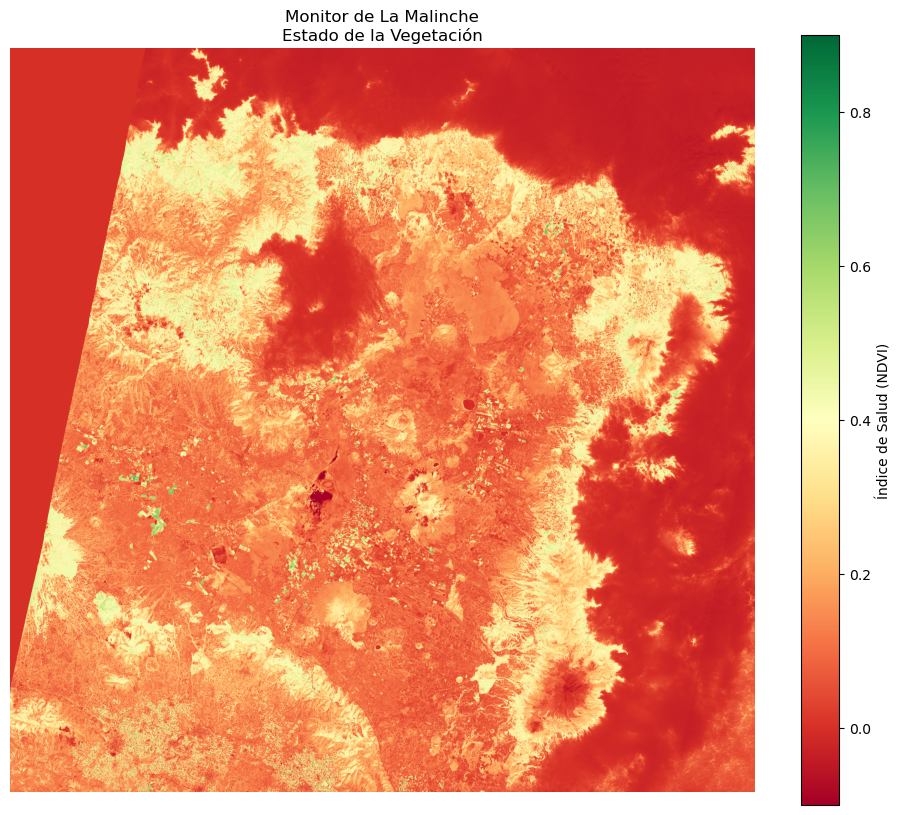

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

ruta_proyecto = "." 

print(f"📡 Escaneando desde: {os.getcwd()}")


busqueda_safe = os.path.join(ruta_proyecto, "*.SAFE")
carpetas_encontradas = glob.glob(busqueda_safe)

if not carpetas_encontradas:
    print("❌ No veo la carpeta .SAFE aquí.")
    print("   Asegúrate de que 'Malinche.SAFE' esté junto a este archivo.")
else:
    safe_folder = carpetas_encontradas[0]
    print(f"✅ Satélite detectado: {safe_folder}")
    
    # --- BÚSQUEDA DE BANDAS (ROJA y NIR) ---
    patron_rojo = os.path.join(safe_folder, "**", "*_B04_10m.jp2")
    patron_nir = os.path.join(safe_folder, "**", "*_B08_10m.jp2")
    
    archivo_rojo = glob.glob(patron_rojo, recursive=True)
    archivo_nir = glob.glob(patron_nir, recursive=True)
    
    if archivo_rojo and archivo_nir:
        print("  📍 Bandas localizadas. Procesando imagen...")
        
        
        with rasterio.open(archivo_rojo[0]) as src:
            rojo = src.read(1).astype('float32')
        with rasterio.open(archivo_nir[0]) as src:
            nir = src.read(1).astype('float32')
            
        # Cálculo NDVI
        ndvi = (nir - rojo) / (nir + rojo + 0.00001)
        
        
        plt.figure(figsize=(12, 10))
        imagen = plt.imshow(ndvi, cmap='RdYlGn', vmin=-0.1, vmax=0.9)
        plt.colorbar(imagen, label='Índice de Salud (NDVI)')
        plt.title(f"Monitor de La Malinche\nEstado de la Vegetación")
        plt.axis('off')
        plt.show()
        
    else:
        print("⚠️ Encontré la carpeta SAFE, pero no las bandas de 10m dentro.")

📊 Generando reporte estadístico de La Malinche...

--- DIAGNÓSTICO DEL TERRITORIO ---
🟤 Suelo Desnudo/Urbano/Seco:  75.86%
🟡 Vegetación Baja/Estrés:     23.42%
🟢 Bosque Denso/Sano:          0.72%
-------------------------------


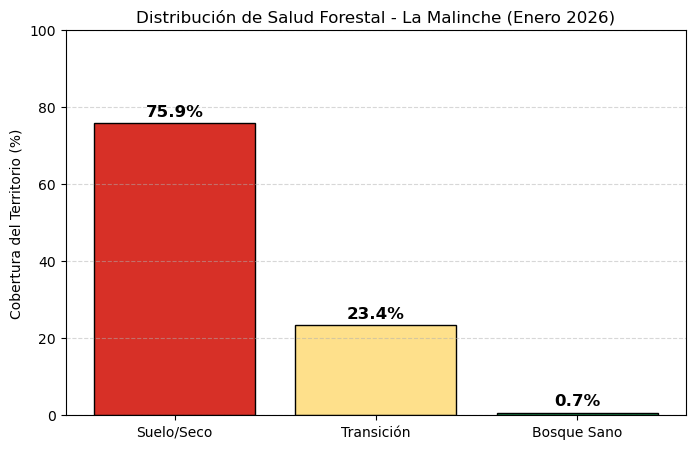

In [2]:
print("📊 Generando reporte estadístico de La Malinche...")


datos_lineales = ndvi.flatten()


datos_validos = datos_lineales[~np.isnan(datos_lineales)]

# Definimos los umbrales (Thresholding)
# < 0.2 : Suelo desnudo / Urbano / Seco
# 0.2 - 0.5 : Vegetación baja / Matorral / Cultivos inactivos
# > 0.5 : Bosque denso / Vegetación sana
total_pixeles = len(datos_validos)

suelo = np.sum(datos_validos < 0.2)
transicion = np.sum((datos_validos >= 0.2) & (datos_validos < 0.5))
bosque = np.sum(datos_validos >= 0.5)

# Calculamos porcentajes
pct_suelo = (suelo / total_pixeles) * 100
pct_transicion = (transicion / total_pixeles) * 100
pct_bosque = (bosque / total_pixeles) * 100

# --- REPORTE IMPRESO ---
print(f"\n--- DIAGNÓSTICO DEL TERRITORIO ---")
print(f"🟤 Suelo Desnudo/Urbano/Seco:  {pct_suelo:.2f}%")
print(f"🟡 Vegetación Baja/Estrés:     {pct_transicion:.2f}%")
print(f"🟢 Bosque Denso/Sano:          {pct_bosque:.2f}%")
print("-------------------------------")

# --- GRÁFICO DE BARRAS ---
categorias = ['Suelo/Seco', 'Transición', 'Bosque Sano']
porcentajes = [pct_suelo, pct_transicion, pct_bosque]
colores = ['#d73027', '#fee08b', '#1a9850'] # Rojo, Amarillo, Verde

plt.figure(figsize=(8, 5))
barras = plt.bar(categorias, porcentajes, color=colores, edgecolor='black')

for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., altura + 1,
             f'{altura:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylabel('Cobertura del Territorio (%)')
plt.title('Distribución de Salud Forestal - La Malinche (Enero 2026)')
plt.ylim(0, 100) # El eje Y va de 0 a 100%
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### 5.1 Interpretación de Resultados: La Fenología Invernal del Valle

La distribución estadística obtenida (75.9% de cobertura en rangos bajos de NDVI) revela una verdad ecológica fundamental sobre la región Puebla-Tlaxcala durante la temporada seca (Enero).

#### A. Análisis Físico: ¿Por qué domina el rojo?
El predominio masivo de la barra roja (**75.9%**) no indica necesariamente devastación forestal, sino **dormancia estacional** y urbanización.

1.  **Física de Suelos y Cultivos (NDVI < 0.2):**
    * En enero, los cultivos de temporal (maíz, cebada) han sido cosechados. El satélite observa **suelo desnudo**.
    * **Comportamiento Espectral:** Sin clorofila, la absorbancia en el Rojo ($K$) disminuye drásticamente, aumentando la reflectancia roja. Simultáneamente, sin estructura celular vegetal, la dispersión en el NIR ($S$) cae.
    * **Resultado:** El contraste espectral se anula: $NIR \approx Rojo \rightarrow NDVI \approx 0$.

2.  **La "Isla" de Resistencia (NDVI > 0.5):**
    * La barra verde (**0.7%**) representa exclusivamente a las **coníferas perennifolias** (Pinos, Oyameles) del Parque Nacional.
    * A diferencia del valle agrícola, estas especies mantienen sus agujas y su actividad fotosintética en invierno. Son la única fuente significativa de absorción de CO₂ y regulación térmica en la imagen durante esta estación.

#### B. Análisis Matemático: El Problema de la Escala
El dato del **0.7%** parece alarmantemente bajo, pero se explica geométricamente por el área de cobertura del sensor (Field of View).

* **Área Total de la Imagen (Sentinel-2 Tile):** $\approx 12,000 \text{ km}^2$ (Abarca zonas urbanas de Puebla, Tlaxcala y campos de cultivo).
* **Área del Parque Nacional La Malinche:** $\approx 461 \text{ km}^2$.

Matemáticamente, estamos observando una **distribución bimodal** desbalanceada donde la "señal" de interés (el bosque) es una anomalía estadística espacial dentro de una matriz dominada por zonas urbanas y agrícolas secas.

> **Conclusión:** La Malinche funciona como un **reservorio biológico crítico**. En invierno, es prácticamente la única zona activa fisiológicamente en todo el valle, resaltando su fragilidad y su importancia vital para el equilibrio hídrico de la región.

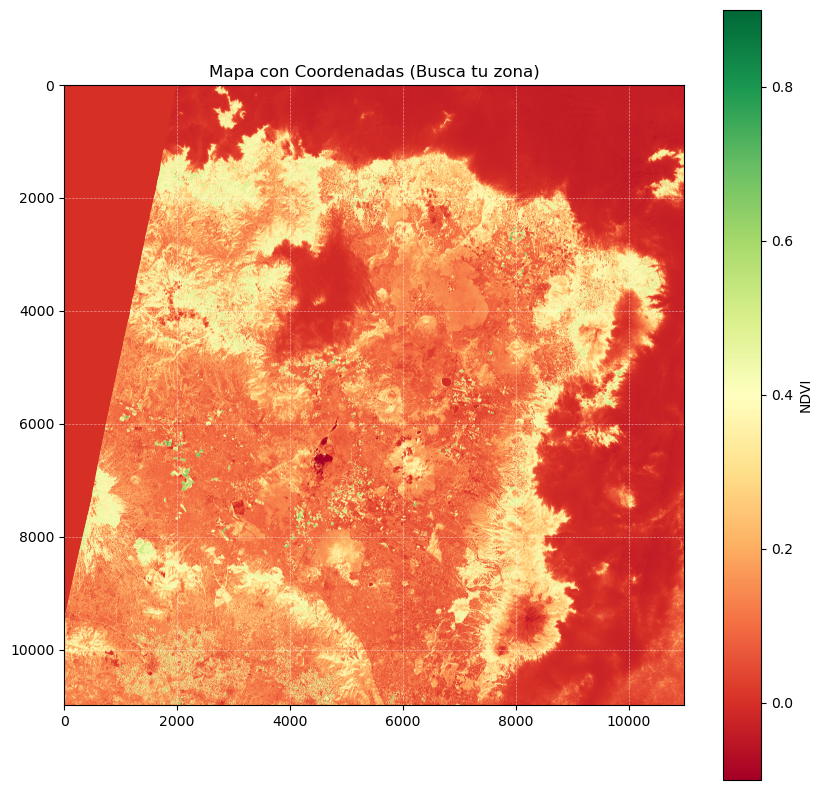

In [9]:

plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn', vmin=-0.1, vmax=0.9)
plt.colorbar(label='NDVI')
plt.title("Mapa con Coordenadas (Busca tu zona)")
plt.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.5)

# Activamos los ejes para ver los números de píxel
plt.axis('on') 
plt.show()

 Recortando zona del volcán: Y(6000-9000) | X(6000-9000)...

--- DIAGNÓSTICO LOCAL (SOLO MONTAÑA) ---
🟤 Zona Seca/Roca:    65.87%
🟡 Zona Transición:   33.63%
🟢 Bosque Residente:  0.50%


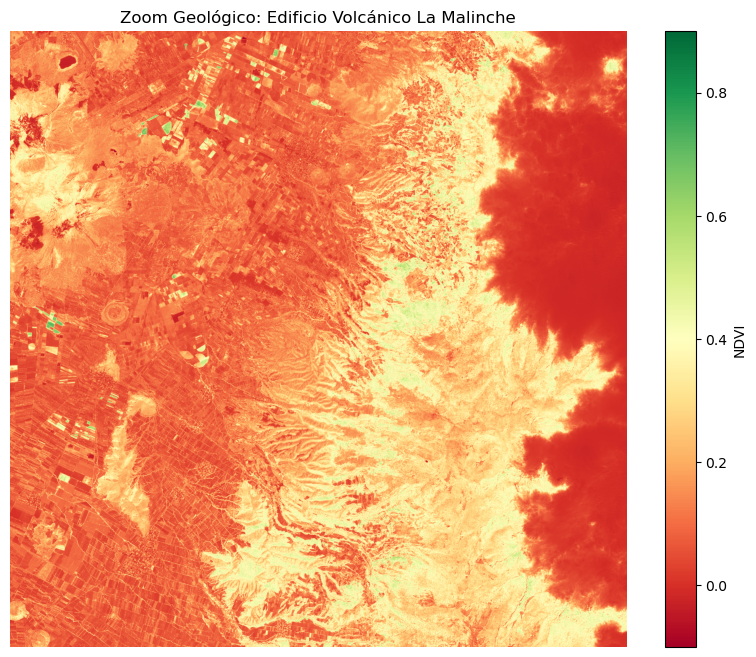

In [15]:
# --- PASO 6.2: RECORTE Y ANÁLISIS FOCALIZADO 

# Coordenadas detectadas visualmente en tu mapa:
y_min, y_max = 6000, 9000  # Altura (Vertical)
x_min, x_max = 6000, 9000  # Anchura (Horizontal)

print(f" Recortando zona del volcán: Y({y_min}-{y_max}) | X({x_min}-{x_max})...")

# 1. Hacemos el recorte (Slicing)
recorte_malinche = ndvi[y_min:y_max, x_min:x_max]

# 2. Calculamos estadísticas NUEVAS (Solo del recorte)
datos_recorte = recorte_malinche.flatten()
datos_validos_r = datos_recorte[~np.isnan(datos_recorte)]
total_r = len(datos_validos_r)

# Clasificación
suelo_r = np.sum(datos_validos_r < 0.2)
transicion_r = np.sum((datos_validos_r >= 0.2) & (datos_validos_r < 0.5))
bosque_r = np.sum(datos_validos_r >= 0.5)

pct_suelo_r = (suelo_r / total_r) * 100
pct_transicion_r = (transicion_r / total_r) * 100
pct_bosque_r = (bosque_r / total_r) * 100

print(f"\n--- DIAGNÓSTICO LOCAL (SOLO MONTAÑA) ---")
print(f"🟤 Zona Seca/Roca:    {pct_suelo_r:.2f}%")
print(f"🟡 Zona Transición:   {pct_transicion_r:.2f}%")
print(f"🟢 Bosque Residente:  {pct_bosque_r:.2f}%")

# 3. Visualizamos el Zoom
plt.figure(figsize=(10, 8))
plt.imshow(recorte_malinche, cmap='RdYlGn', vmin=-0.1, vmax=0.9)
plt.colorbar(label='NDVI')
plt.title(f"Zoom Geológico: Edificio Volcánico La Malinche")
plt.axis('off')
plt.show()

✅ ¡LISTO! Imagen guardada como: Analisis_Malinche_2026.png
📂 Búscala en tu carpeta: Proyecto_Malintzi


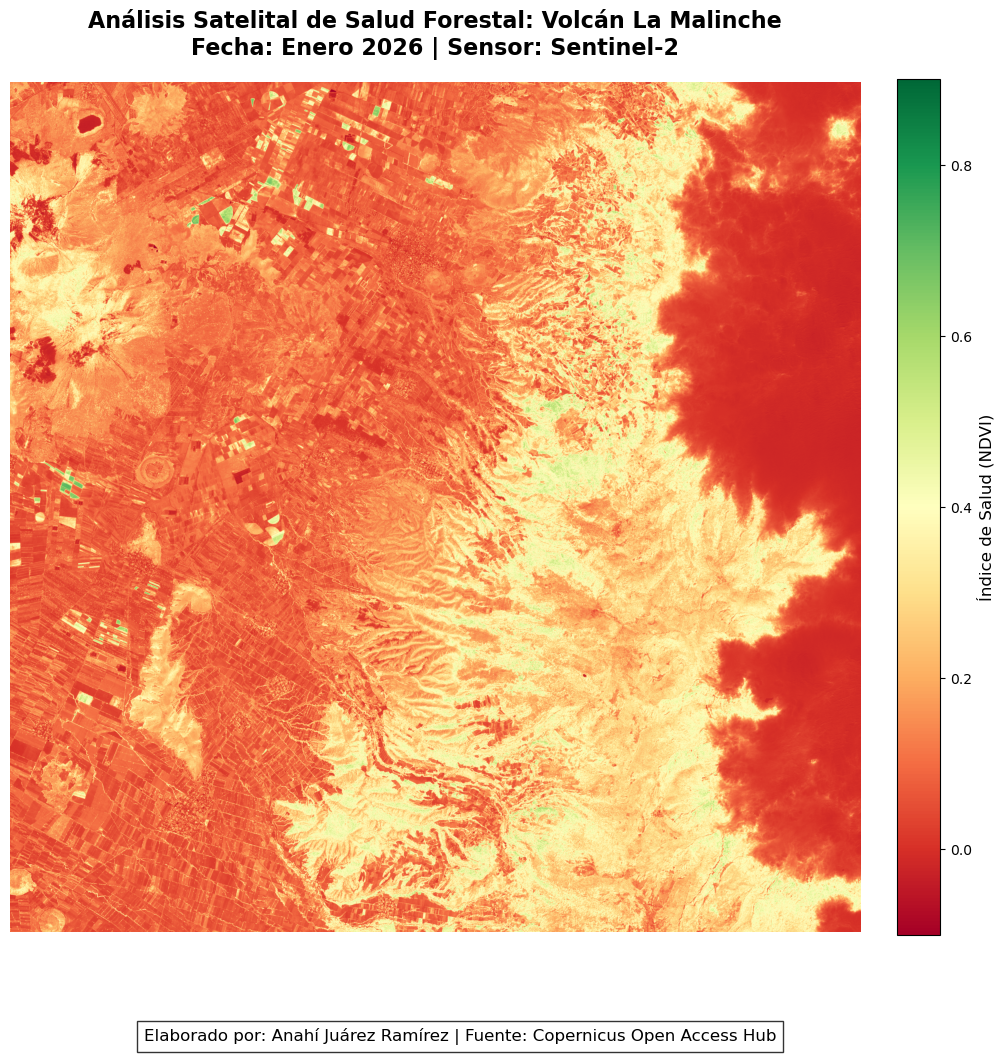

In [11]:
# --- PASO FINAL: GENERADOR DE REPORTE GRÁFICO ---
import matplotlib.patches as patches

# Configuración de la imagen final
fig, ax = plt.subplots(figsize=(12, 12)) # Tamaño grande para alta calidad

# Dibujamos el mapa
imagen = ax.imshow(recorte_malinche, cmap='RdYlGn', vmin=-0.1, vmax=0.9)

# Barra de colores
cbar = plt.colorbar(imagen, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Índice de Salud (NDVI)', fontsize=12)


plt.title(f"Análisis Satelital de Salud Forestal: Volcán La Malinche\nFecha: Enero 2026 | Sensor: Sentinel-2", 
          fontsize=16, fontweight='bold', pad=20)


plt.figtext(0.5, 0.05, "Elaborado por: Anahí Juárez Ramírez | Fuente: Copernicus Open Access Hub", 
            ha="center", fontsize=12, bbox={"facecolor":"white", "alpha":0.8, "pad":5})

# Quitamos los ejes feos
plt.axis('off')

# --- GUARDAR ARCHIVO ---
nombre_archivo = "Analisis_Malinche_2026.png"
plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight') # dpi=300 es calidad de impresión
plt.show()

### 6. Análisis a Micro-Escala: El Edificio Volcánico

Mediante la segmentación espacial de la imagen (cropping), se aisló la estructura geológica del volcán La Malinche para eliminar el sesgo estadístico provocado por la mancha urbana y la agricultura extensiva del valle.

#### A. Resultados Cuantitativos (Zoom)
Al restringir el análisis a las coordenadas del cono volcánico, la distribución de coberturas se reconfigura:

| Clase (NDVI) | Porcentaje | Interpretación Ecológica/Geológica |
| :--- | :--- | :--- |
| **🟤 Zona Seca/Roca** (< 0.2) | **65.87%** | Corresponde al cono volcánico (roca andesítica sin vegetación), arenales y zacatonal alpino en dormancia invernal. |
| **🟡 Zona de Transición** (0.2 - 0.5) | **33.63%** | **Dato Crítico:** Representa el matorral xerófilo y el bosque disperso o estresado. Aumentó un **~10%** respecto al análisis regional, indicando que las faldas del volcán actúan como zona de amortiguamiento (buffer). |
| **🟢 Bosque Residente** (> 0.5) | **0.50%** | Bosque de coníferas de alta densidad. Su bajo porcentaje indica una alta fragmentación: los árboles sanos no forman un bloque continuo, sino que están dispersos. |

#### B. Análisis de Patrones Geo-Espaciales
La inspección visual del recorte revela dos morfologías contrastantes que explican la salud del ecosistema:

1.  **Geometría Rectilínea (Antrópica):** En el cuadrante inferior izquierdo, se observan patrones cuadriculados que penetran las faldas del volcán. Esto evidencia el avance de la **frontera agrícola**, transformando bosque en zonas de cultivo (actualmente secas/rojas).
2.  **Geometría Dendrítica (Natural):** Las líneas verdes/amarillas que descienden radialmente desde la cima corresponden a **barrancas y cañadas**.
    * **Fenómeno de Refugio Topográfico:** La vegetación sana (NDVI > 0.5) se concentra casi exclusivamente dentro de estas grietas geológicas, donde la humedad se conserva mejor y el acceso para la tala es difícil.

> **Conclusión del Zoom:** El análisis focalizado demuestra que el bosque denso de La Malinche no es una "mancha" uniforme, sino un sistema **altamente fragmentado**. La vegetación activa en invierno sobrevive principalmente refugiada en las cañadas, mientras que las laderas expuestas muestran signos de estrés hídrico o presión agrícola.
# El análisis satelital es una herramienta poderosa para defender derechos fundamentales:

Derecho a un Medio Ambiente Sano: Con esto se puede probar matemáticamente si una fábrica o una inmobiliaria está destruyendo el bosque (comparando fotos de 2022 vs 2025).

Derecho al Agua: La salud del bosque predice la recarga de acuíferos de Puebla. Si el bosque baja, el agua falta.

Justicia Social: Puedes ver si las zonas más calientes (sin árboles) coinciden con las colonias más pobres de la ciudad (islas de calor).